### Text Classification Assignment by:
- Yusri Al-Sanaani
- Hetvi Soni
- Tavleen Kour
- Immanuella Iyawe
Group: Group: DSA_202101_ 7

---
### Import the required libraries
---

In [1]:
import re   
import nltk
import random
import pandas as pd
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

## **1. Data Preparation**

---
## 1.1 Import some books
---

In [5]:
nltk.download('gutenberg')
book1 = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
book2 = nltk.corpus.gutenberg.raw('carroll-alice.txt')
book3 = nltk.corpus.gutenberg.raw('whitman-leaves.txt')
book4 = nltk.corpus.gutenberg.raw('milton-paradise.txt')
book5 = nltk.corpus.gutenberg.raw('bryant-stories.txt')
# Create a list of books
books=[book1,book2,book3,book4,book5]

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\yusri\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


## 1.2 Extract the books titles and authors names using regex

In [6]:
# Extract the books_titles and authors_names by creating a regex pattern 
# that match book title, author name, and year of publication: 
books_authors_names=[]
for book in books:
    la=re.findall("(\[[ a-zA-Z0-9 '_.+-|\]+ by [ a-zA-Z0-9-]+|\.[ a-zA-Z0-9-.]+\])", book)
    books_authors_names.append(''.join(la[0]))

# Now, we can remove special characters, numbers,and right/left white space
# to get only the book title and author name:
clean_books_authors_names=[]
for i in range(len(books_authors_names)):
    clean_names=re.sub(r'[\d+\\!"#$%&()*+,-./:;?@[\]^_`{|}~]',' ',books_authors_names[i]).strip() 
    split_names=re.split('by',clean_names)
    clean_books_authors_names.append(split_names)

In [7]:
# books_authors_names before cleaning
print('The book title, author name, and year of publication:')
books_authors_names

The book title, author name, and year of publication:


['[The Man Who Was Thursday by G. K. Chesterton 1908]',
 "[Alice's Adventures in Wonderland by Lewis Carroll 1865]",
 '[Leaves of Grass by Walt Whitman 1855]',
 '[Paradise Lost by John Milton 1667] ',
 '[Stories to Tell to Children by Sara Cone Bryant 1918] ']

In [8]:
# books_authors_names after cleaning
clean_books_authors_names

[['The Man Who Was Thursday ', ' G  K  Chesterton'],
 ["Alice's Adventures in Wonderland ", ' Lewis Carroll'],
 ['Leaves of Grass ', ' Walt Whitman'],
 ['Paradise Lost ', ' John Milton'],
 ['Stories to Tell to Children ', ' Sara Cone Bryant']]

In [9]:
# Create book_names list and authors_labels list
def list_split(lst):
    return lst[:(len(lst)//2)], lst[(len(lst)//2):]
books_names=[]
authors_names=[]
for i in range(len(clean_books_authors_names)):
    book, author = list_split(clean_books_authors_names[i])
    books_names.append(''.join(book).strip())
    authors_names.append(''.join(author).strip())
    
# Create an automatic list for authors last name:
authors_labels=[]
for i in range(len(authors_names)):
    authors_labels.append(authors_names[i].split()[-1])

In [10]:
# we need list of books_lables
books_labels=books_names
books_labels

['The Man Who Was Thursday',
 "Alice's Adventures in Wonderland",
 'Leaves of Grass',
 'Paradise Lost',
 'Stories to Tell to Children']

In [11]:
# also we need a list of authors_labels ['Chesterton','Carroll','Whitman','Milton','Bryant']
authors_labels

['Chesterton', 'Carroll', 'Whitman', 'Milton', 'Bryant']

In [12]:
# Display the books and the curresponding authors
books_authors=pd.DataFrame({'Books':books_labels, 'Authors':authors_labels},index=[1,2,3,4,5])
books_authors

,Books,Authors
1,The Man Who Was Thursday,Chesterton
2,Alice's Adventures in Wonderland,Carroll
3,Leaves of Grass,Whitman
4,Paradise Lost,Milton
5,Stories to Tell to Children,Bryant


## 1.3 Create a general function to clean the data of multiple books

This function takes list of books as input and returns a list of cleaned books.
The cleaning includes:
- Removing multiple spaces and left/right white spaces.
- Conevrting capital characters to lower case
- Removing special characters
- Removing single character word

In [13]:
def get_clean_text(textbooks_data):
    cleaned_books=[]
    for book in textbooks_data:
        single_lower= re.sub(r'\s+',' ',book).lower() # Multiple space removal and conevrt to lower case
        #clean_text = re.sub(r'[\\!"#$%&()*+,-./:;?@[\]^_`{|}~]',' ',single_lower).strip() # Remove special characters
        clean_text = re.sub('[^a-zA-Z]',' ', single_lower)
        #clean_text = re.sub(r"\s+[a-zA-Z]\s+", ' ', clean_text) # remove single character word
        cleaned_books.append(clean_text)
    return cleaned_books

In [14]:
cleaned_books=get_clean_text(books)

## 1.4 Defining a function to partition multiple books (get_chunks() function):
- This function takes dict as input  that contains the labels (books and authors names) and books content.
- It returns a list of partitioned books with labeling each partition to the book it belongs to.

In [15]:
# partitioning the text data with auto labeling 
def get_chunks(chunk_books_dict):
    import nltk
    nltk.download('punkt')
    chunk_books=[]
    chunk_books_labels=[]
    for label,book in chunk_books_dict.items():
        #splits = book.split()
        tokenized_word=nltk.word_tokenize(book)
        labeled_chunks=[]
        chunks_labels=[]
        for i in range(0,len(tokenized_word),100):
            #labeled_chunks.append((' '.join(tokenized_word[i:100+i]),label))
            labeled_chunks.append(' '.join(tokenized_word[i:100+i]))
            chunks_labels.append(label)
        chunk_books.append(labeled_chunks)
        chunk_books_labels.append(chunks_labels)
    return chunk_books,chunk_books_labels

In [16]:
# uncleaned books books
uncleaned_chunk_books_dict={}
for i,book in enumerate(books):
    uncleaned_chunk_books_dict[authors_labels[i]]=book
chunk_books1,chunk_books_labels1=get_chunks(uncleaned_chunk_books_dict)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yusri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# Try this function:
#chunk_books_dict1=dict(zip(authors_labels,cleaned_books))
chunk_books_dict={}
for i,book in enumerate(cleaned_books):
    chunk_books_dict[authors_labels[i]]=book
chunk_books,chunk_books_labels=get_chunks(chunk_books_dict)
#print(len(chunk_books))
#print(chunk_books[0][0],'\n\n',chunk_books[1][0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yusri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# Check if each book contains enough text data to ensure getting 200 chunks
for i,book in enumerate(chunk_books):
    if len(book)<200:
        print('The book # {} does not contain enough text data (it has only {} chunks).'.format(i+1,len(book)))
    else:
        print("The book # {} contains {} chunks.".format(i+1,len(book)))

The book # 1 contains 588 chunks.
The book # 2 contains 274 chunks.
The book # 3 contains 1264 chunks.
The book # 4 contains 806 chunks.
The book # 5 contains 468 chunks.


## 1.5 Creating random samples of 200 partitions for each book
Defining a function to return 200 random chunks for each book(get_random_chunks function):
- This function takes a list of previously partioned books as input.
- It returns a list of books conataining 200 random chunks each.

In [19]:
def get_random_chunks(chunk_books):
    import random
    random.seed(1)
    random_chunks=[]
    for book in chunk_books:
        chunks=random.sample(book, 200)
        random_chunks.append(chunks)
    return random_chunks

In [20]:
books_random_chunks_uncleaned=get_random_chunks(chunk_books1)
books_random_chunks=get_random_chunks(chunk_books)
#print(random_chunks[0][0],'\n\n',random_chunks[1][0])
# Check if each book contains enough text data to ensure getting 200 chunks
for i,book in enumerate(books_random_chunks):
    print("The book # {} contains {} chunks.".format(i+1,len(book)))

The book # 1 contains 200 chunks.
The book # 2 contains 200 chunks.
The book # 3 contains 200 chunks.
The book # 4 contains 200 chunks.
The book # 5 contains 200 chunks.


## 1.6 Create data frame

In [21]:
# Uncleaned dataframe
df_books1=pd.DataFrame()
for i in range(len(books_random_chunks)):
    dfs=pd.DataFrame({'books_text_data':books_random_chunks_uncleaned[i],'authors_labels':chunk_books_labels1[i][:200]})
    df_books1=df_books1.append(dfs)

df_books1.reset_index(drop=True,inplace=True)
df_books1.sample(5)

,books_text_data,authors_labels
184,", however , kept him hopeful and yet helpless ...",Chesterton
101,helpless . It was with some momentary difficul...,Chesterton
856,the fox began to swim the river . When he was ...,Bryant
487,mark as my own you shall offset it with your o...,Whitman
508,of a sick person -- yet behold ! The grass of ...,Whitman


# **2. Feature Engineering**

## 2.1 Clean the text

In [22]:
# Cleaned text
df_books=pd.DataFrame()
for i in range(len(books_random_chunks)):
    dfs=pd.DataFrame({'books_text_data':books_random_chunks[i],'authors_labels':chunk_books_labels[i][:200]})
    df_books=df_books.append(dfs)

df_books.reset_index(drop=True,inplace=True)
df_books.sample(5)

,books_text_data,authors_labels
846,big alligator who lives in the mud down there ...,Bryant
264,an hour or so and were quite dry again the dod...,Carroll
286,beautiful soup chapter xi who stole the tarts ...,Carroll
417,street comes before me the unknown soldier s g...,Whitman
275,the king the queen the royal children and ever...,Carroll


## 2.2 Stop words removal

In [23]:
# remove Stopwords
def remove_stopwords(books_text_data):
    nltk.download('stopwords')
    stop_words = nltk.corpus.stopwords.words("english")
    splited_text=books_text_data.str.split()
    text_no_stopwords=[]
    for i in range(len(splited_text)):
        text_no_stopwords1 = [word for word in splited_text[i] if word not in stop_words]
        text_no_stopwords.append(' '.join(text_no_stopwords1))
    return text_no_stopwords

In [24]:
a=remove_stopwords(df_books['books_text_data'])
df_books['text_no_stopwords']=a; df_books.sample(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yusri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,books_text_data,authors_labels,text_no_stopwords
324,kings and queens and among them alice recognis...,Carroll,kings queens among alice recognised white rabb...
768,where he sat and the third sacred morn began t...,Milton,sat third sacred morn began shine dawning heav...
497,theban the large ball d eyes the side drooping...,Whitman,theban large ball eyes side drooping neck hand...
850,passed and felt so wounded that at last he wis...,Bryant,passed felt wounded last wished never born slo...
918,with harness the lazy man jumped on its back a...,Bryant,harness lazy man jumped back queer low back mo...


## 2.3 Lemmatization and Stemming

In [25]:
# Lemmatisation (convert the word into root word)
def lemmatisation(books_text_data):
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    splited_text=books_text_data.str.split()
    lemmatized_words=[]
    for i in range(len(splited_text)):
        lemmatized_words1 =' '.join([lem.lemmatize(word) for word in splited_text[i]])
        lemmatized_words.append(lemmatized_words1)
    return lemmatized_words

In [26]:
nltk.download('wordnet')
b=lemmatisation(df_books['books_text_data'])
df_books['lemmatized_text']=b; df_books.sample(5)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yusri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,books_text_data,authors_labels,text_no_stopwords,lemmatized_text
395,would bend about easily in any direction like ...,Carroll,would bend easily direction like serpent succe...,would bend about easily in any direction like ...
417,street comes before me the unknown soldier s g...,Whitman,street comes unknown soldier grave comes inscr...,street come before me the unknown soldier s gr...
87,you will destroy mankind you will destroy the ...,Chesterton,destroy mankind destroy world let suffice yet ...,you will destroy mankind you will destroy the ...
428,i had him sit next me at table my fire lock le...,Whitman,sit next table fire lock lean corner twenty ei...,i had him sit next me at table my fire lock le...
91,are you prepared in the presence of that card ...,Chesterton,prepared presence card deny company shall say ...,are you prepared in the presence of that card ...


In [27]:
bb=lemmatisation(df_books['text_no_stopwords'])
df_books['lemm_nostopwords_text']=bb; df_books.sample(5)

,books_text_data,authors_labels,text_no_stopwords,lemmatized_text,lemm_nostopwords_text
682,upper world the rest were all far to the inlan...,Milton,upper world rest far inland retired walls pand...,upper world the rest were all far to the inlan...,upper world rest far inland retired wall pande...
838,had a splendid brain in her little head it lik...,Bryant,splendid brain little head liked study thought...,had a splendid brain in her little head it lik...,splendid brain little head liked study thought...
996,for many minutes for it was not a soft place i...,Bryant,many minutes soft place assure wished soft war...,for many minute for it wa not a soft place i c...,many minute soft place assure wished soft warm...
363,dreadfully fond of beheading people here the g...,Carroll,dreadfully fond beheading people great wonder ...,dreadfully fond of beheading people here the g...,dreadfully fond beheading people great wonder ...
188,time he finds it quite difficult to walk uprig...,Chesterton,time finds quite difficult walk upright good g...,time he find it quite difficult to walk uprigh...,time find quite difficult walk upright good go...


In [28]:
#Stemming
def stem_word(books_text_data):
    ps=nltk.stem.porter.PorterStemmer()
    splited_text=books_text_data.str.split()
    stem_words=[]
    for i in range(len(splited_text)):
        stem_words1 =' '.join([ps.stem(word) for word in splited_text[i]])
        stem_words.append(stem_words1)
    return stem_words

In [29]:
c=stem_word(df_books['books_text_data'])
df_books['stem_text']=c; df_books.sample(5)

,books_text_data,authors_labels,text_no_stopwords,lemmatized_text,lemm_nostopwords_text,stem_text
138,so jolly like a balloon himself said dr bull d...,Chesterton,jolly like balloon said dr bull desperately un...,so jolly like a balloon himself said dr bull d...,jolly like balloon said dr bull desperately un...,so jolli like a balloon himself said dr bull d...
993,found her sitting in a tent by the side of an ...,Bryant,found sitting tent side old white haired hermi...,found her sitting in a tent by the side of an ...,found sitting tent side old white haired hermi...,found her sit in a tent by the side of an old ...
729,seed shall bruise the serpent s head piteous a...,Milton,seed shall bruise serpent head piteous amends ...,seed shall bruise the serpent s head piteous a...,seed shall bruise serpent head piteous amends ...,seed shall bruis the serpent s head piteou ame...
952,of nature there sprang from the sons of odin a...,Bryant,nature sprang sons odin race men became mighty...,of nature there sprang from the son of odin a ...,nature sprang son odin race men became mighty ...,of natur there sprang from the son of odin a r...
190,don t mind being anything in german thought ar...,Chesterton,mind anything german thought police service sa...,don t mind being anything in german thought ar...,mind anything german thought police service sa...,don t mind be anyth in german thought are you ...


In [30]:
#df_books[['books_text_data','authors_labels']]

In [31]:
#print(str(ss.iloc[0][0]))
#print(str(df_books.iloc[0][0]))

## 2.4 Labels encoding

In [32]:
# Encode the authors labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels_encoder=le.fit_transform(df_books['authors_labels'])
#print(labels_encoder)
#print(list(le.classes_))
#print(list(le.inverse_transform(labels_encoder)))
#print(list(le.inverse_transform(le.classes_)))
print(list(le.inverse_transform([0,1,2,3,4]))) # decode the labels to get the orginal labels

['Bryant', 'Carroll', 'Chesterton', 'Milton', 'Whitman']


In [33]:
df_books.insert(loc=2, column='labels_encoder',value=labels_encoder) # insert the encoded labels to the dataframe

In [34]:
df_books.sample(5)

,books_text_data,authors_labels,labels_encoder,text_no_stopwords,lemmatized_text,lemm_nostopwords_text,stem_text
626,howled within unseen far less abhorred than th...,Milton,3,howled within unseen far less abhorred vexed s...,howled within unseen far le abhorred than thes...,howled within unseen far le abhorred vexed scy...,howl within unseen far less abhor than these v...
300,and i wish you wouldn t keep appearing and van...,Carroll,1,wish keep appearing vanishing suddenly make on...,and i wish you wouldn t keep appearing and van...,wish keep appearing vanishing suddenly make on...,and i wish you wouldn t keep appear and vanish...
383,heard a little pattering of footsteps in the d...,Carroll,1,heard little pattering footsteps distance look...,heard a little pattering of footstep in the di...,heard little pattering footstep distance looke...,heard a littl patter of footstep in the distan...
142,unquestionably urgent that all this time syme ...,Chesterton,2,unquestionably urgent time syme staring doctor...,unquestionably urgent that all this time syme ...,unquestionably urgent time syme staring doctor...,unquestion urgent that all thi time syme had b...
1,man you lie no agonies can be too great to buy...,Chesterton,2,man lie agonies great buy right say accuser al...,man you lie no agony can be too great to buy t...,man lie agony great buy right say accuser also...,man you lie no agoni can be too great to buy t...


## 2.5 Text Data Analysis
### 2.5.1 Chunks count

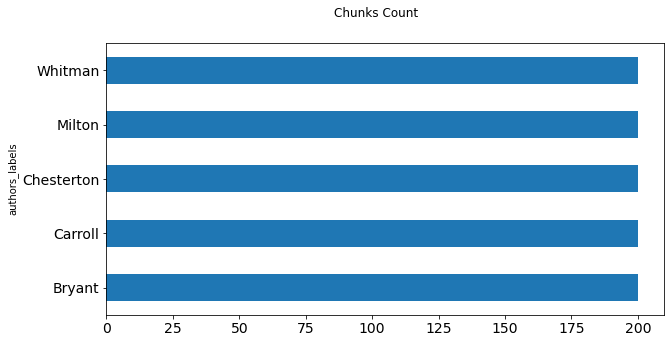

In [35]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#import wordcloud
fig, ax = plt.subplots()
fig.suptitle('Chunks Count', fontsize=12)
df_books["authors_labels"].reset_index().groupby("authors_labels").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, ax=ax,figsize=(10,5),fontsize=14)
plt.show()

### 2.5.2 Length Analysis

In [34]:
#For Length Analysis, create a new dataframe
new_df_books=df_books[["books_text_data","authors_labels",'labels_encoder']].copy()
new_df_books['word_count'] = new_df_books["books_text_data"].apply(lambda x: len(str(x).split()))
new_df_books['char_count'] = new_df_books["books_text_data"].apply(lambda x: sum(len(word) for word in str(x).split()))
new_df_books['sentence_count'] = new_df_books["books_text_data"].apply(lambda x: len(str(x).split(".")))
new_df_books['avg_word_length'] = new_df_books['char_count'] / new_df_books['word_count']
new_df_books['avg_sentence_lenght'] = new_df_books['word_count'] / new_df_books['sentence_count']
new_df_books.sample(5)

,books_text_data,authors_labels,labels_encoder,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
622,have fixed my lot certain to undergo like doom...,Milton,3,100,394,1,3.94,100.0
512,companions to buy tokens souvenirs of gems and...,Whitman,4,100,432,1,4.32,100.0
147,mouth to put it syme sprang to his feet and sa...,Chesterton,2,100,398,1,3.98,100.0
313,at the stick and tumbled head over heels in it...,Carroll,1,100,397,1,3.97,100.0
704,armies bright which but th omnipotent none cou...,Milton,3,100,467,1,4.67,100.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


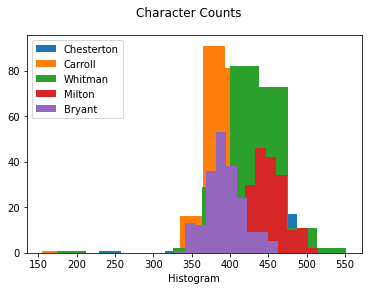

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

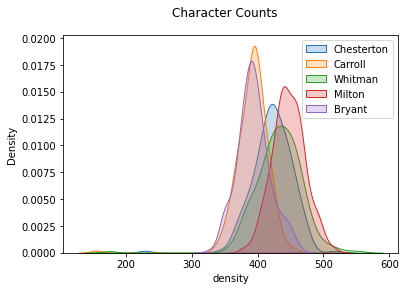

In [35]:
#length distributions:
x, y = "char_count", "authors_labels"
fig, ax = plt.subplots()
fig.suptitle('Character Counts', fontsize=12)
for i in new_df_books[y].unique():
    a=sns.distplot(new_df_books[new_df_books[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":1}, 
                 axlabel="Histogram", ax=ax)
ax.grid(False); ax.legend(new_df_books[y].unique()); plt.show()
# -------------------------------------------------------------------
fig, ax = plt.subplots()
fig.suptitle('Character Counts', fontsize=12)
for i in new_df_books[y].unique():
    sns.distplot(new_df_books[df_books[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density", ax=ax)
ax.grid(False); ax.legend(new_df_books[y].unique()); plt.show()

### 2.5.3 Word Frequency

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


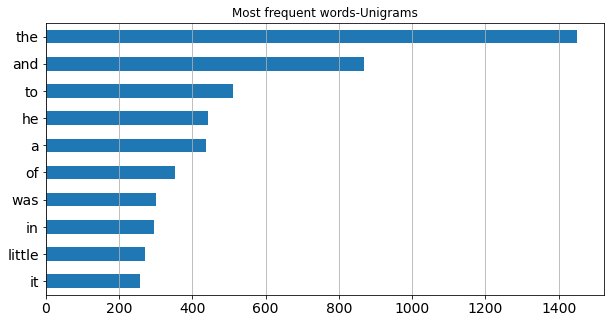

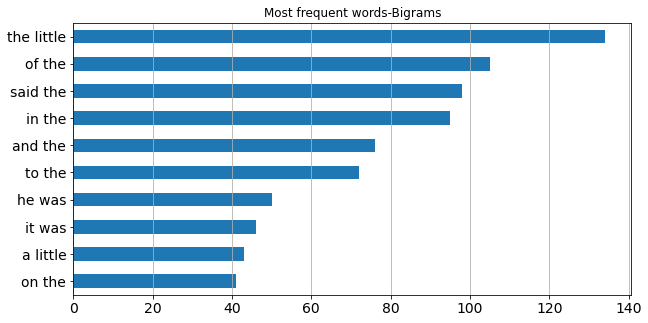

In [36]:
#Word Frequency
top=10
nltk.download('punkt')
## for vectorizer
from sklearn import feature_extraction, manifold
y = 0 # BOOK 1
corpus = new_df_books[new_df_books["labels_encoder"]==y]["books_text_data"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))   
## unigrams
fig, ax = plt.subplots() 
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
    kind="barh", title="Most frequent words-Unigrams", ax=ax,legend=False,
    figsize=(10,5),fontsize=14).grid(axis='x'); ax.set(ylabel=None); plt.show()

## bigrams
fig, ax = plt.subplots()
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(string for string in x) )
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
    kind="barh", title="Most frequent words-Bigrams", ax=ax,legend=False,
    figsize=(10,5),fontsize=14).grid(axis='x'); ax.set(ylabel=None); plt.show()

In [37]:
#df_books.drop(df_books_X)
#new_df_books.drop(columns='love',inplace=True)
#new_df_books

### 2.5.4 Visualization-wordcloud

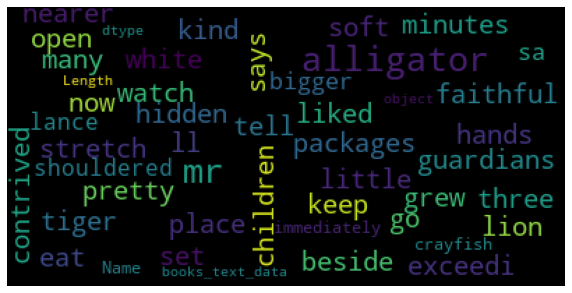

In [38]:
# Visualization- wordcloud:
!pip install wordcloud
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordcloud
word_cloud = wordcloud.WordCloud(background_color='black', max_words=200, 
                         max_font_size=25)
word_cloud = word_cloud.generate(str(corpus))
fig = plt.figure(num=1,figsize=(10,10)); plt.axis('off')
plt.imshow(word_cloud, cmap=None); plt.show()

-----------------------------
---------------------
------------

## 2.6 Train-test split
Divide the data to training set and testing set 85/15

In [36]:
# divide the data to training set and testing set 85/15
from sklearn.model_selection import train_test_split
df_books_train, df_books_test, df_books_labels_train, df_books_labels_test = train_test_split(
df_books['lemm_nostopwords_text'],df_books['labels_encoder'], test_size=0.15, random_state=0)

## 2.7 Text representation
### 2.7.1 BOW Transformation

In [37]:
# Transformation BOW
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df_books_BOW=count_vect.fit_transform(df_books['lemm_nostopwords_text']).toarray()
#Divide Test and Train for BOW
df_books_train_BOW, df_books_test_BOW, df_books_labels_train_BOW, df_books_labels_test_BOW=train_test_split(
df_books_BOW,df_books['labels_encoder'], test_size=0.15, random_state=0)

print(df_books_train_BOW.shape)
print(df_books_test_BOW.shape)

(850, 8992)
(150, 8992)


### 2.7.2 TF-iDF Transformation

In [38]:
#TFiDF Transformation
# Parameter election
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2); min_df = 10; max_df = 1.
#; max_features = 300
# max_features=max_features
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)
df_books_train_tfidf = tfidf.fit_transform(df_books_train).toarray()
print(df_books_train_tfidf.shape)
df_books_test_tfidf = tfidf.transform(df_books_test).toarray()
print(df_books_test_tfidf.shape)

(850, 761)
(150, 761)


In [42]:
print(tfidf)

TfidfVectorizer(lowercase=False, min_df=10, ngram_range=(1, 2),
                sublinear_tf=True)


# 3. Machine Learning Models

We will try three machine learning classification models and compare them to find the best one.
- Support Vector Machine
- K Nearest Neighbors
- Decision Tree
- Multinomial Naïve Bayes

The methodology used to train each model is as follows:
- At first check what parameters the model has.
- Implement the baseline model and measure its accuracy.
- Perform 10-fold cross validation, check the accuracy.
- Then, decide what parameters we need to tune in order to get better performance.
- Measure the model performance by defining the metric (accuracy). 
- Perform Grid Search Cross Validation process to  find the best hyperparameters.
- When getting the best parameters, the confusion matrix, classification report, and accuracy are used to analyze the model performance on both training and test data.
- Compare the accuracy of baseline model and tuned model to check if we got better performance.
- The best model will be chosen based on testing accuracy.

## **3.1 SVM**

In [42]:
# First, we can see what hyperparameters the model has:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
SVM = svm.SVC()
print('Check the parameters of SVM:\n',SVM.get_params())

Check the parameters of SVM:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [43]:
# Check the accuracy of the SVM base model:
from sklearn import svm
SVM_base_model = svm.SVC()
SVM_base_model.fit(df_books_train_tfidf, df_books_labels_train)
SVM_base_model_accur=accuracy_score(df_books_labels_test, SVM_base_model.predict(df_books_test_tfidf))
print('The accuracy score of SVM_base_model:',SVM_base_model_accur)

The accuracy score of SVM_base_model: 0.8933333333333333


### 3.1.1 SVM Cross-Validation

In [44]:
# SVM model with 10-fold cross-validation
from sklearn import svm
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
SVM_cross = svm.SVC()
SVM_cross.fit(df_books_train_tfidf, df_books_labels_train)
scores = cross_val_score(SVM_cross, df_books_train_tfidf, df_books_labels_train, cv=cv)
print("By using 10-fold cross-validation for SVM model:\n",np.array(scores))
print("\n","mean: {:.2f}\n std: {:.4f}".format(scores.mean(),scores.std()))
# Okay, 0.91 is bery good. That means that the average accuracy (percentage of correct classifications using the
# trained model) is 91 %. That accuracy is  high, but let’s see if better parameters can be found using grid search.

By using 10-fold cross-validation for SVM model:
 [0.90196078 0.89411765 0.92156863 0.90588235 0.91764706 0.91372549
 0.88235294 0.90588235 0.92156863 0.91372549]

 mean: 0.91
 std: 0.0119


### 3.1.2 Grid Search Cross Validation
Creating parameters grid for:
- Penalty parameter(C)
- Kernel coefficient(gamma)
- degree of the polynomial
- Kernel type
- probability


In [45]:
# Grid Search Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
C = [.0001,.001,.01,.1,1]; degree = [3,4,5]; gamma = [1,10,100]; probability = [True]
grid_SVM = [{'C': C, 'kernel':['linear'], 'probability':probability},
              {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
              {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}]

# Create a base model
SVM_model = svm.SVC()
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
SVM_grid_search = GridSearchCV(SVM_model, param_grid=grid_SVM, scoring='accuracy',cv=cv, verbose=1)

# Fit the grid search to the data
SVM_grid_search.fit(df_books_train_tfidf, df_books_labels_train)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed: 17.2min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecat...
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1],
                          'kernel': ['linear'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1],
                          'degree': [3, 4, 5], 'kernel': ['poly'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
         

In [46]:
# The best obtained parameters from grid search:
print("The best parameters for SVM model from Grid Search:\n",SVM_grid_search.best_params_,'\n')
print("The mean accuracy of SVM model:",SVM_grid_search.best_score_)

The best parameters for SVM model from Grid Search:
 {'C': 1, 'kernel': 'linear', 'probability': True} 

The mean accuracy of SVM model: 0.9086274509803921


In [48]:
# so far, we got the best tuned parameters for SVM model.
# store it as best_SVM:
best_SVM = SVM_grid_search.best_estimator_
best_SVM
#best_SVM_BOW=SVM_grid_search.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### 3.1.3 SVM Model Performance
The confusion matrix, classification report, and accuracy are used to analyze the model performance on both training and test data.


In [49]:
best_SVM.fit(df_books_train_tfidf, df_books_labels_train) # fit the DT model to the training data
best_SVM_pred = best_SVM.predict(df_books_test_tfidf)   # let the model predict the test data
# compare the model after parameters tuning to its base model to check if we got a better model
SVM_base_model_accur=accuracy_score(df_books_labels_test, SVM_base_model.predict(df_books_test_tfidf))
best_SVM_accur=accuracy_score(df_books_labels_test, best_SVM.predict(df_books_test_tfidf))
print('The accuracy score of SVM_base_model:',SVM_base_model_accur)
print('\nThe accuracy score of best_SVM model:',best_SVM_accur)

# Training accuracy
print("\nTraining accuracy of SVM model: ",accuracy_score(df_books_labels_train, best_SVM.predict(df_books_train_tfidf)))
# Test accuracy
print("\nTest accuracy of SVM model: ",accuracy_score(df_books_labels_test, best_SVM_pred))
# Classification report
print("\nClassification report of SVM model:\n", classification_report(df_books_labels_test,best_SVM_pred))

The accuracy score of SVM_base_model: 0.8933333333333333

The accuracy score of best_SVM model: 0.8933333333333333

Training accuracy of SVM model:  0.9976470588235294

Test accuracy of SVM model:  0.8933333333333333

Classification report of SVM model:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       1.00      0.93      0.96        40
           2       0.90      0.86      0.88        21
           3       0.88      0.88      0.88        32
           4       0.82      0.88      0.85        32

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



In [50]:
# Make a model
#import mlxtend

!pip install mlxtend --upgrade --no-deps


#from mlxtend.evaluate import bias_variance_decomp
#from mlxtend.evaluate import bias_variance_decomp

     |████████████████████████████████| 1.4MB 16.9MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [51]:
# Gauge the bias and varianc
import mlxtend
from mlxtend.evaluate import bias_variance_decomp
mse_SVM, bias_SVM, var_SVM = bias_variance_decomp(best_SVM, df_books_train_tfidf, 
                                                  df_books_labels_train.values,
                                                  df_books_test_tfidf, df_books_labels_test.values, 
                                                  loss='mse')
print(' Average MSE: {:4f}\n Average Bias: {:.4f}\n Average Variance: {:.4f}'.
      format(mse_SVM,bias_SVM,var_SVM))

 Average MSE: 0.482233
 Average Bias: 0.2933
 Average Variance: 0.1890


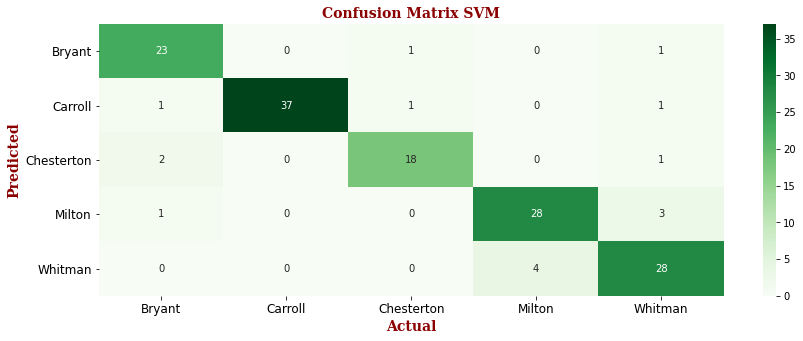

In [52]:
# Confusion matrix
SVM_df = df_books[['authors_labels', 'labels_encoder']].drop_duplicates().sort_values('labels_encoder')
font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 14}
SVM_conf_matrix = confusion_matrix(df_books_labels_test, best_SVM_pred)
plt.figure(figsize=(14,5))
sns.heatmap(SVM_conf_matrix, 
            annot=True,
            xticklabels=SVM_df['authors_labels'].values, 
            yticklabels=SVM_df['authors_labels'].values,
            cmap="Greens")
plt.ylabel('Predicted',fontdict=font)
plt.xlabel('Actual',fontdict=font)
plt.title('Confusion Matrix SVM',fontdict=font)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.show()

In [53]:
# We'll create a dataset with a model summary to compare models later on:
from sklearn.metrics import precision_recall_fscore_support as score
precision_SVM,recall_SVM,fscore_SVM,support_SVM=score(df_books_labels_test,best_SVM_pred,average='macro')
SVM_model = {'Model': 'SVM', 'Training Accuracy': 
            accuracy_score(df_books_labels_train, best_SVM.predict(df_books_train_tfidf)),
            'Test Accuracy': accuracy_score(df_books_labels_test, best_SVM_pred),
             'Precision':precision_SVM,'Recall':recall_SVM,'Fscore':fscore_SVM,
             'MSE':mse_SVM,'Bias':bias_SVM,'Var':var_SVM}
SVM_model_df = pd.DataFrame(SVM_model, index=[0])
SVM_model_df

,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore,MSE,Bias,Var
0,SVM,0.957647,0.893333,0.890076,0.890429,0.889438,0.482233,0.293263,0.188971


In [ ]:
# TRY BOW INSTEAD OF TF-IDF
#df_books_train_BOW, df_books_test_BOW, df_books_labels_train_BOW, df_books_labels_test_BOW
# We'll create a dataset with a model summary to compare models later on:
from sklearn.metrics import precision_recall_fscore_support as score
best_SVM_BOW.fit(df_books_train_BOW, df_books_labels_train_BOW) # fit the DT model to the training data
best_SVM_pred_BOW = best_SVM_BOW.predict(df_books_test_BOW)   # let the model predict the test data
precision_SVM1,recall_SVM1,fscore_SVM1,support_SVM1=score(df_books_labels_test_BOW,best_SVM_pred_BOW,average='macro')
SVM_model_BOW = {'Model': 'SVM-BOW', 'Training Accuracy': 
            accuracy_score(df_books_labels_train_BOW, best_SVM_BOW.predict(df_books_train_BOW)),
            'Test Accuracy': accuracy_score(df_books_labels_test_BOW, best_SVM_pred_BOW),
             'Precision':precision_SVM1,'Recall':recall_SVM1,'Fscore':fscore_SVM1}
SVM_model_df_BOW = pd.DataFrame(SVM_model_BOW, index=[0])
SVM_model_df_BOW

,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore
0,SVM-BOW,1.0,0.933333,0.932301,0.933452,0.932141


In [ ]:
# TRY BOW INSTEAD OF TF-IDF
# Check the accuracy of the SVM base model:
from sklearn import svm
SVM_base_model1 = svm.SVC()
SVM_base_model1.fit(df_books_train_BOW, df_books_labels_train_BOW)
SVM_base_model1_accur=accuracy_score(df_books_labels_test_BOW, SVM_base_model1.predict(df_books_test_BOW))
print('The accuracy score of SVM_base_model:',SVM_base_model1_accur)

The accuracy score of SVM_base_model: 0.8933333333333333


In [ ]:
# TRY BOW INSTEAD OF TF-IDF
from sklearn import svm
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
SVM_cross1 = svm.SVC()
SVM_cross1.fit(df_books_train_BOW, df_books_labels_train_BOW)
scores1 = cross_val_score(SVM_cross1, df_books_train_BOW, df_books_labels_train_BOW, cv=cv)
print("By using 10-fold cross-validation for SVM model:\n",np.array(scores))
print("\n","mean: {:.2f}\n std: {:.4f}".format(scores1.mean(),scores1.std()))

By using 10-fold cross-validation for SVM model:
 [0.72156863 0.7254902  0.7372549  0.69803922 0.74509804 0.69019608
 0.69411765 0.71372549 0.76078431 0.74901961]

 mean: 0.89
 std: 0.0212


In [ ]:
# We can see that in all cases the category is not 100% clear, since these articles contain concepts of
# both categories. These errors will always happen and we are not looking forward to be 100% accurate on them.

## 3.2 **KNN** Model

In [ ]:
# First, we can see what parameters the model has:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
print('Check the parameters of KNN:\n',KNN.get_params())

Check the parameters of KNN:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
# Check the accuracy of the KNN base model:
KNN_base_model = KNeighborsClassifier()
KNN_base_model.fit(df_books_train_tfidf, df_books_labels_train)
KNN_base_model_accur=accuracy_score(df_books_labels_test, KNN_base_model.predict(df_books_test_tfidf))
print('The accuracy score of KNN_base_model:',KNN_base_model_accur)

The accuracy score of KNN_base_model: 0.8333333333333334


### 3.2.1 KNN Cross-Validation

In [ ]:
# KNN model with 10-fold cross-validation
from sklearn.model_selection import  cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
KNN_cross = KNeighborsClassifier()
KNN_cross.fit(df_books_train_tfidf, df_books_labels_train)
scores = cross_val_score(KNN_cross, df_books_train_tfidf, df_books_labels_train, cv=cv)
print("By sing 10-fold cross-validation for KNN model:\n","mean: {:.2f}\n std: {:.4f}".format(scores.mean(),scores.std()))
# Okay, 0.720 is not too bad. That means that the average accuracy (percentage of correct classifications using the
# trained model) is 72%. That accuracy is  high, but let’s if see if better parameters can be found using grid search:

By sing 10-fold cross-validation for KNN model:
 mean: 0.83
 std: 0.0303


### 3.2.2 Grid Search Cross Validation
Use grid search to check if we can tune the number of neighbors (k).

In [ ]:
# Creating a parameter grid for number of neighbors (k)
param_grid = {'n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]}
KNN_model = KNeighborsClassifier() # Create a base model
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
KNN_grid_search = GridSearchCV(KNN_model, param_grid=param_grid, scoring='accuracy',cv=cv, verbose=1)
# Fit the grid search to the train data
KNN_grid_search.fit(df_books_train_tfidf, df_books_labels_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  4.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
# The best obtained parameter from grid search:
print("The best parameters for KNN model from Grid Search:\n",KNN_grid_search.best_params_,'\n')
print("The mean accuracy of KNN model:",KNN_grid_search.best_score_)

The best parameters for KNN model from Grid Search:
 {'n_neighbors': 93} 

The mean accuracy of KNN model: 0.887843137254902


In [ ]:
# so far, we got the best tuned parameter for KNN model.
# store it as best_KNN:
best_KNN = KNN_grid_search.best_estimator_
best_KNN
#best_KNN_BOW=KNN_grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=93, p=2,
                     weights='uniform')

### 3.2.3 KNN Model Performance
The confusion matrix, classification report, and accuracy are used to analyze the model performance on both training and test data.


In [ ]:
# compare the model after parameters tuning to its base model to check if we got a better model
best_KNN_accur=accuracy_score(df_books_labels_test, best_KNN.predict(df_books_test_tfidf))
print('The accuracy score of SVM_base_model:',KNN_base_model_accur)
print('\nThe accuracy score of best_SVM model:',best_KNN_accur)

best_KNN.fit(df_books_train_tfidf, df_books_labels_train) # fit the DT model to the training data
best_KNN_pred = best_KNN.predict(df_books_test_tfidf)   # let the model predict the test data
# Training accuracy
print("\nTraining accuracy of KNN model: ",accuracy_score(df_books_labels_train, best_KNN.predict(df_books_train_tfidf)))
# Test accuracy
print("\nTest accuracy of KNN model: ",accuracy_score(df_books_labels_test, best_KNN_pred))
# Classification report
print("\nClassification report of KNN model:\n", classification_report(df_books_labels_test,best_KNN_pred))

The accuracy score of SVM_base_model: 0.8333333333333334

The accuracy score of best_SVM model: 0.8666666666666667

Training accuracy of KNN model:  0.9035294117647059

Test accuracy of KNN model:  0.8666666666666667

Classification report of KNN model:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.93      0.97      0.95        40
           2       0.83      0.90      0.86        21
           3       0.83      0.94      0.88        32
           4       0.85      0.69      0.76        32

    accuracy                           0.87       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.87      0.87      0.86       150



In [ ]:
mse_KNN, bias_KNN, var_KNN = bias_variance_decomp(best_KNN, df_books_train_tfidf, 
                                                  df_books_labels_train.values,
                                                  df_books_test_tfidf, df_books_labels_test.values, 
                                                  loss='mse')
print(' Average MSE: {:4f}\n Average Bias: {:.4f}\n Average Variance: {:.4f}'.
      format(mse_KNN,bias_KNN,var_KNN))

 Average MSE: 0.656200
 Average Bias: 0.4306
 Average Variance: 0.2256


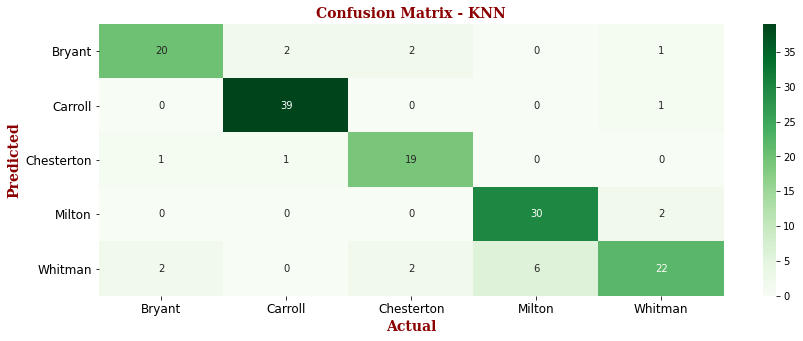

In [ ]:
#confusion matrix
KNN_df = df_books[['authors_labels', 'labels_encoder']].drop_duplicates().sort_values('labels_encoder')
font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 14}
KNN_conf_matrix = confusion_matrix(df_books_labels_test, best_KNN_pred)
plt.figure(figsize=(14,5))
sns.heatmap(KNN_conf_matrix, 
            annot=True,
            xticklabels=KNN_df['authors_labels'].values, 
            yticklabels=KNN_df['authors_labels'].values,
            cmap="Greens")
plt.ylabel('Predicted',fontdict=font)
plt.xlabel('Actual',fontdict=font)
plt.title('Confusion Matrix - KNN',fontdict=font)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.show()

In [ ]:
 #cmap="YlGnBu","Blues","BuPu","Greens"

In [ ]:
#We can see that the default model (with 5 Nearest Neighbors) performs better. However, 
#in our Grid Search Cross Validation process we tried with that number of neighbors. 
#The reason why we may be getting this result is because de Grid Search performs a Cross Validation scheme, 
# while this last comparison uses all training data.

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_KNN,recall_KNN,fscore_KNN,support_KNN=score(df_books_labels_test,best_KNN_pred,average='macro')
KNN_model = {'Model': 'KNN', 'Training Accuracy': 
            accuracy_score(df_books_labels_train, best_KNN.predict(df_books_train_tfidf)),
            'Test Accuracy': accuracy_score(df_books_labels_test, best_KNN_pred),
             'Precision':precision_KNN,'Recall':recall_KNN,'Fscore':fscore_KNN,
             'MSE':mse_KNN,'Bias':bias_KNN,'Var':var_KNN}
KNN_model_df = pd.DataFrame(KNN_model, index=[0])
KNN_model_df

,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore,MSE,Bias,Var
0,KNN,0.863529,0.866667,0.860742,0.860952,0.857833,0.6562,0.430624,0.225576


In [ ]:
# KNN model with 10-fold cross-validation
from sklearn.model_selection import  cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
KNN_cross1 = KNeighborsClassifier()
KNN_cross1.fit(df_books_train_BOW, df_books_labels_train_BOW)
scores1 = cross_val_score(KNN_cross1, df_books_train_BOW, df_books_labels_train_BOW, cv=cv)
print("By sing 10-fold cross-validation for KNN model:\n","mean: {:.2f}\n std: {:.4f}".format(scores1.mean(),scores1.std()))
# Okay, 0.720 is not too bad. That means that the average accuracy (percentage of correct classifications using the
# trained model) is 72%. That accuracy is  high, but let’s if see if better parameters can be found using grid search:

By sing 10-fold cross-validation for KNN model:
 mean: 0.50
 std: 0.0350


In [ ]:
#df_books_train_BOW, df_books_test_BOW, df_books_labels_train_BOW, df_books_labels_test_BOW
# We'll create a dataset with a model summary to compare models later on:
from sklearn.metrics import precision_recall_fscore_support as score
best_KNN_BOW.fit(df_books_train_BOW, df_books_labels_train_BOW) # fit the DT model to the training data
best_KNN_pred_BOW = best_KNN_BOW.predict(df_books_test_BOW)   # let the model predict the test data
precision_KNN1,recall_KNN1,fscore_KNN1,support_KNN1=score(df_books_labels_test_BOW,best_KNN_pred_BOW,average='macro')
KNN_model_BOW = {'Model': 'KNN-BOW', 'Training Accuracy': 
            accuracy_score(df_books_labels_train_BOW, best_KNN_BOW.predict(df_books_train_BOW)),
            'Test Accuracy': accuracy_score(df_books_labels_test_BOW, best_KNN_pred_BOW),
             'Precision':precision_KNN1,'Recall':recall_KNN1,'Fscore':fscore_KNN1}
KNN_model_df_BOW = pd.DataFrame(KNN_model_BOW, index=[0])
KNN_model_df_BOW

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore
0,KNN-BOW,0.397647,0.433333,0.562899,0.410381,0.337023


### **3.3 Decision Trees**

In [ ]:
# DT base model:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

DT_base_model= DecisionTreeClassifier() # Create Decision Tree classifer object
DT_base_model=DT_base_model.fit(df_books_train_tfidf, df_books_labels_train) # Train Decision Tree Classifer
#Predict the response for test dataset
DT_base_model_pred = DT_base_model.predict(df_books_test_tfidf)
DT_base_model_accur=accuracy_score(df_books_labels_test, DT_base_model.predict(df_books_test_tfidf))
print("Accuracy:",metrics.accuracy_score(df_books_labels_test, DT_base_model_pred))

Accuracy: 0.7333333333333333


### 3.3.1 DT Cross-Validation

In [ ]:
# DT model with 10-fold cross-validation
from sklearn.model_selection import  cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
DT_cross = DecisionTreeClassifier()
DT_cross.fit(df_books_train_tfidf, df_books_labels_train)
scores = cross_val_score(DT_cross, df_books_train_tfidf, df_books_labels_train, cv=cv)
print("By sing 10-fold cross-validation for DT model:\n","mean: {:.2f}\n std: {:.4f}".format(scores.mean(),scores.std()))
# Okay, 0.720 is not too bad. That means that the average accuracy (percentage of correct classifications using the
# trained model) is 72%. That accuracy is  high, but let’s if see if better parameters can be found using grid search:

By sing 10-fold cross-validation for DT model:
 mean: 0.72
 std: 0.0297


In [ ]:
# Okay, 0.720 is not too bad. That means that the average accuracy (percentage of correct classifications using the
# trained model) is 72%. That accuracy is  high, but let’s if see if better parameters can be found using grid search:


### 3.3.2 Grid Search Cross Validation for DT

In [ ]:
DT_clf= DecisionTreeClassifier()
param_grid = {"criterion": ["gini", "entropy"], "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20]}
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
grid_search_DT = GridSearchCV(DT_clf, param_grid=param_grid, cv=cv)
grid_search_DT.fit(df_books_train_tfidf, df_books_labels_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs

In [ ]:
# The best parameters obtained from grid search:
print("The best parameters for DT model from Grid Search:\n",grid_search_DT.best_params_,'\n')
print("The mean accuracy of DT model is:",grid_search_DT.best_score_)

The best parameters for DT model from Grid Search:
 {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2} 

The mean accuracy of DT model is: 0.74


In [ ]:
# store the best DT model
best_DT = grid_search_DT.best_estimator_
#best_DT_BOW=grid_search_DT.best_estimator_

### 3.3.3 DT Model Performance
The confusion matrix, classification report, and accuracy are used to analyze the model performance on both training and test data.


In [ ]:
# compare the model after parameters tuning to its base model to check if we got a better model
best_DT_accur=accuracy_score(df_books_labels_test, best_DT.predict(df_books_test_tfidf))
print('The accuracy score of DT_base_model:',DT_base_model_accur)
print('\nThe accuracy score of best DT model:',best_DT_accur)

best_DT.fit(df_books_train_tfidf, df_books_labels_train) # fit the DT model to the training data
best_DT_pred = best_DT.predict(df_books_test_tfidf)   # let the model predict the test data
# Training accuracy
print("\nTraining accuracy of DT model: ",accuracy_score(df_books_labels_train, best_DT.predict(df_books_train_tfidf)))
# Test accuracy
print("\nTest accuracy of DT model: ",accuracy_score(df_books_labels_test, best_DT_pred))
# Classification report
print("\nClassification report of DT model:\n", classification_report(df_books_labels_test,best_DT_pred))

The accuracy score of DT_base_model: 0.7333333333333333

The accuracy score of best DT model: 0.7533333333333333

Training accuracy of DT model:  0.8129411764705883

Test accuracy of DT model:  0.7533333333333333

Classification report of DT model:
               precision    recall  f1-score   support

           0       0.59      0.80      0.68        25
           1       1.00      0.78      0.87        40
           2       0.81      0.62      0.70        21
           3       0.95      0.66      0.78        32
           4       0.60      0.88      0.71        32

    accuracy                           0.75       150
   macro avg       0.79      0.75      0.75       150
weighted avg       0.81      0.75      0.76       150



In [ ]:
mse_DT, bias_DT, var_DT = bias_variance_decomp(best_DT, df_books_train_tfidf, 
                                                  df_books_labels_train.values,
                                                  df_books_test_tfidf, df_books_labels_test.values, 
                                                  loss='mse')
print(' Average MSE: {:4f}\n Average Bias: {:.4f}\n Average Variance: {:.4f}'.
      format(mse_DT,bias_DT,var_DT))

 Average MSE: 1.518800
 Average Bias: 0.9208
 Average Variance: 0.5980


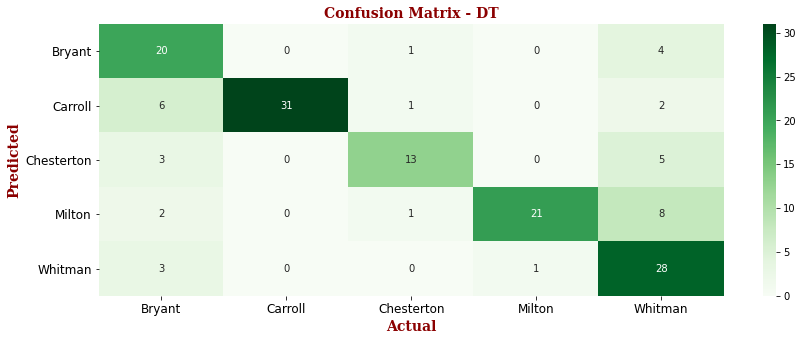

In [ ]:
DT_df = df_books[['authors_labels', 'labels_encoder']].drop_duplicates().sort_values('labels_encoder')
font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 14}
DT_conf_matrix = confusion_matrix(df_books_labels_test, best_DT_pred)
plt.figure(figsize=(14,5))
sns.heatmap(DT_conf_matrix, 
            annot=True,
            xticklabels=DT_df['authors_labels'].values, 
            yticklabels=DT_df['authors_labels'].values,
            cmap="Greens")
plt.ylabel('Predicted',fontdict=font)
plt.xlabel('Actual',fontdict=font)
plt.title('Confusion Matrix - DT',fontdict=font)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision_DT,recall_DT,fscore_DT,support_DT=score(df_books_labels_test,best_DT_pred,average='macro')

DT_model = {'Model': 'DT', 'Training Accuracy': 
            accuracy_score(df_books_labels_train, best_DT.predict(df_books_train_tfidf)),
            'Test Accuracy': accuracy_score(df_books_labels_test, best_DT_pred),
            'Precision':precision_DT,'Recall':recall_DT,'Fscore':fscore_DT,
            'MSE':mse_DT,'Bias':bias_DT,'Var':var_DT}
DT_model_df = pd.DataFrame(DT_model, index=[0])
DT_model_df

,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore,MSE,Bias,Var
0,DT,0.8,0.753333,0.790205,0.74506,0.748109,1.5188,0.920826,0.597974


In [ ]:
#df_books_train_BOW, df_books_test_BOW, df_books_labels_train_BOW, df_books_labels_test_BOW
# We'll create a dataset with a model summary to compare models later on:
from sklearn.metrics import precision_recall_fscore_support as score
best_DT_BOW.fit(df_books_train_BOW, df_books_labels_train_BOW) # fit the DT model to the training data
best_DT_pred_BOW = best_DT_BOW.predict(df_books_test_BOW)   # let the model predict the test data
precision_DT1,recall_DT1,fscore_DT1,support_DT1=score(df_books_labels_test_BOW,best_DT_pred_BOW,average='macro')
DT_model_BOW = {'Model': 'DT-BOW', 'Training Accuracy': 
            accuracy_score(df_books_labels_train_BOW, best_DT_BOW.predict(df_books_train_BOW)),
            'Test Accuracy': accuracy_score(df_books_labels_test_BOW, best_DT_pred_BOW),
             'Precision':precision_DT1,'Recall':recall_DT1,'Fscore':fscore_DT1}
DT_model_df_BOW = pd.DataFrame(DT_model_BOW, index=[0])
DT_model_df_BOW

,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore
0,DT-BOW,0.810588,0.72,0.781677,0.71381,0.715322


# **4. Best Model Selection**

Three classification models have been used in this assignment

### 4.1 Models **Summary** and Comparison




In [ ]:
df_summary = pd.DataFrame()
models=[DT_model_df,KNN_model_df,SVM_model_df]
for df in models:
  df_summary=df_summary.append(df).reset_index().drop('index', axis=1)
df_summary

,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore,MSE,Bias,Var
0,DT,0.800000,0.753333,0.790205,0.745060,0.748109,1.5188,0.920826,0.597974
1,KNN,0.863529,0.866667,0.860742,0.860952,0.857833,0.6562,0.430624,0.225576
2,SVM,0.963529,0.893333,0.890076,0.890429,0.889438,0.4761,0.296762,0.179338


In [ ]:
df_summary.sort_values('Test Accuracy', ascending=False).reset_index().drop('index', axis=1) # And sort it by Test Accuracy:

,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore,MSE,Bias,Var
0,SVM,0.963529,0.893333,0.890076,0.890429,0.889438,0.4761,0.296762,0.179338
1,KNN,0.863529,0.866667,0.860742,0.860952,0.857833,0.6562,0.430624,0.225576
2,DT,0.800000,0.753333,0.790205,0.745060,0.748109,1.5188,0.920826,0.597974


The DT seems to be overfit, so we'll discard it. From the remaining models, we will choose the Support Vector Machine since it has the highest Test Accuracy.

In [ ]:
# create dataframe for the models with BOW
df_summary_BOW = pd.DataFrame()
models_BOW=[DT_model_df_BOW,KNN_model_df_BOW,SVM_model_df_BOW]
for df in models_BOW:
  df_summary_BOW=df_summary_BOW.append(df).reset_index().drop('index', axis=1)
df_summary_BOW

,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore
0,DT-BOW,0.810588,0.720000,0.781677,0.713810,0.715322
1,KNN-BOW,0.397647,0.433333,0.562899,0.410381,0.337023
2,SVM-BOW,1.000000,0.933333,0.932301,0.933452,0.932141


In [ ]:
df_summary_BOW.sort_values('Test Accuracy', ascending=False).reset_index().drop('index', axis=1) # And sort it by Test Accuracy:

,Model,Training Accuracy,Test Accuracy,Precision,Recall,Fscore
0,SVM-BOW,1.000000,0.933333,0.932301,0.933452,0.932141
1,DT-BOW,0.810588,0.720000,0.781677,0.713810,0.715322
2,KNN-BOW,0.397647,0.433333,0.562899,0.410381,0.337023


In [ ]:
df_summary.to_excel("output.xlsx") 
df_summary.to_excel(r'D:\SUMMARY.xlsx', index = False)

### 4.2 Best Model Interpretation

At this point we have selected the SVM as our preferred model to do the predictions. We will now study its behaviour by analyzing misclassified text. Hopefully this will give us some insights on the way the model is working.

In [ ]:
# Indexes of the test set
best_SVM.fit(df_books_train_tfidf, df_books_labels_train) # fit the SVM model to the training data
predictions = best_SVM.predict(df_books_test_tfidf)
index_df_books_test = df_books_test.index
df_test = df_books.loc[index_df_books_test]
# Add the predictions
df_test['Predicted_Authors'] = le.inverse_transform(predictions)
df_test = df_test[['books_text_data', 'authors_labels', 'labels_encoder', 'Predicted_Authors']]
df_test.drop(columns='labels_encoder',inplace=True)
df_test.sample(10)

,books_text_data,authors_labels,Predicted_Authors
408,spin around turning always towards mecca i see...,Whitman,Whitman
412,earth does this is curious and may not be real...,Whitman,Whitman
958,clown answered very sadly that it was just as ...,Bryant,Bryant
531,city but these and all and the brown and sprea...,Whitman,Whitman
319,ve got to grow up again let me see how is it t...,Carroll,Carroll
939,lazy man what became of him and his crab no on...,Bryant,Bryant
636,so might the wrath fond wish couldst thou supp...,Milton,Milton
993,found her sitting in a tent by the side of an ...,Bryant,Bryant
859,come along home like this all right mammy said...,Bryant,Bryant
495,all all is for individuals all is for you no c...,Whitman,Whitman


In [ ]:
# Let's get the misclassified text partitions:
df_misclassified = df_test[(df_test['authors_labels'] != df_test['Predicted_Authors'])]
df_misclassified.head(20)

,books_text_data,authors_labels,Predicted_Authors
31,car and after staring wildly at the wintry sky...,Chesterton,Bryant
310,she thought it must be the right house because...,Carroll,Chesterton
883,one second after midnight it will be too late ...,Bryant,Chesterton
45,the great poisoning princes of the renaissance...,Chesterton,Bryant
698,foretold what shall befall him or his children...,Milton,Whitman
783,spangling the hemisphere then first adorned wi...,Milton,Bryant
141,heard in silence the hum of insects and the di...,Chesterton,Whitman
982,the sea king was hard of heart like frode and ...,Bryant,Whitman
501,today thou art all over set in births and joys...,Whitman,Milton
785,reins from the equinoctial road like distant b...,Milton,Whitman


In [ ]:
print('The number of misclassified partitions: {}. They are around {:.2f} % of the total predicted partitions.'.
      format(len(df_misclassified),(len(df_misclassified)/len(df_test))*100))

The number of misclassified partitions: 16. They are around 10.67 % of the total predicted partitions.


### 4.3 Create a pipeline

In [ ]:
# Create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

SVM_Pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', best_SVM)])

#Training
SVM_Pipeline.fit(df_books_train, df_books_labels_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=1, kernel='linear', probability=True))])

### 4.4 Scoring the pipeline

In [ ]:
# Scoring the pipeline
docs_new = ['in a small tug up the silent thames armed with', 
            'watch like faithful guardians beside the open',
            'can tell you and other packages bigger that sa']
predicted = SVM_Pipeline.predict(docs_new)
for doc, category in zip(docs_new, predicted):
    print('The author of following text ({}) is {}'.format(doc,''.join(le.inverse_transform([category]))))

The author of following text (in a small tug up the silent thames armed with) is Chesterton
The author of following text (watch like faithful guardians beside the open) is Bryant
The author of following text (can tell you and other packages bigger that sa) is Whitman


### 4.5 Threshold determination for conditional probability

We need to reduce the conditional probability belonging to every class becuase our text data set consists of 5 different books. Therefore, if we passed a text paragraphs that not belong to one of these books, we will get a wrong prediction.

In [ ]:
# define a prediction function
def prediction(text):
    predicted = SVM_Pipeline.predict(text)
    for doc, category in zip(text, predicted):
        print('The author of predicted text: {}'.format(''.join(le.inverse_transform([category]))))
    pred_proba = SVM_Pipeline.predict_proba(text)
    for i in range(len(text)):
        print("The corresponding conditional probability :{:.2f}".format(pred_proba[i].max()*100))

In [ ]:
# we can predict the author of some random partitions belong to our data set

text=[df_books['books_text_data'].iloc[300],df_books['books_text_data'].iloc[350],
      df_books['books_text_data'].iloc[400],
     df_books['books_text_data'].iloc[440],df_books['books_text_data'].iloc[600]]
prediction(text)

The author of predicted text: Carroll
The author of predicted text: Carroll
The author of predicted text: Whitman
The author of predicted text: Whitman
The author of predicted text: Milton
The corresponding conditional probability :99.99
The corresponding conditional probability :99.97
The corresponding conditional probability :99.88
The corresponding conditional probability :99.94
The corresponding conditional probability :100.00


In [ ]:
# check the authors by comparing the result by the actual authors
text_authors=[df_books['authors_labels'].iloc[300],
              df_books['authors_labels'].iloc[350],
              df_books['authors_labels'].iloc[400],
              df_books['authors_labels'].iloc[440],
              df_books['authors_labels'].iloc[600]]
print(text_authors)
# we prediction gave us the same actual authors

['Carroll', 'Carroll', 'Whitman', 'Whitman', 'Milton']


In [ ]:
# Let us predict text that not related to our data set
# taking some paragraphs from other books

b1 = nltk.corpus.gutenberg.raw('austen-emma.txt')
b2 = nltk.corpus.gutenberg.raw('chesterton-brown.txt')
b3 = nltk.corpus.gutenberg.raw('blake-poems.txt')
# Create a list of books
books=[b1,b2,b3]
new_authors=['Austen','Chesterton','Blake']
new_books=['austen-emma','chesterton-brown','blake-poems']
austen_emma='''The want of Miss Taylor would be felt every hour of every day.\nShe recalled 
her past kindness--the kindness, the affection of sixteen\nyears--how she had taught and how 
she had played with her from five\nyears old--how she had devoted all her powers to attach and 
amuse\nher in health--and how nursed her through the variousillnesses\nof childhood'''
chesterton_brown='''A tantalus\ncontaining three kinds of spirit, all of a liqueur excellence,
\nstood always on this table of luxury; but the fanciful have asserted\nthat the whisky, brandy,
and rum seemed always to stand at the same level.\nPoetry was there:  the left-hand corner of the 
room was lined with\nas complete a set of English classics as the right hand could show\nof English 
and foreign physiologists'''
blake_poems='''The little boy weeping sought.\n \n \n LAUGHING SONG\n \n When the green woods laugh 
with the voice of joy,\n And the dimpling stream runs laughing by;\n When the air does laugh with our merry 
wit,\n And the green hill laughs with the noise of it;\n \n when the meadows laugh with lively green,\n And the 
grasshopper laughs in the merry scene,\n When Mary and Susan and Emily\n With their sweet round mouths sing "Ha, ha he'''


In [ ]:
# clean the text
austen_emma=re.sub('[^a-zA-Z]',' ', austen_emma)
chesterton_brown=re.sub('[^a-zA-Z]',' ', chesterton_brown)
blake_poem=re.sub('[^a-zA-Z]',' ', blake_poems)
docs_new=[austen_emma,chesterton_brown,blake_poem]

In [ ]:
prediction(docs_new)

The author of predicted text: Whitman
The author of predicted text: Chesterton
The author of predicted text: Whitman
The corresponding conditional probability :78.27
The corresponding conditional probability :78.02
The corresponding conditional probability :73.73


In [ ]:
# as seen, the model classified the new text to our authors wrongly and the probability  is reduced.

In [ ]:
# divide the data to training set and testing set 85/15
from sklearn.model_selection import train_test_split
# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
x_train, x_test, y_train, y_test = train_test_split(
df_books['lemmatized_text'],df_books['labels_encoder'], test_size=0.15, random_state=0)

#books_text_data	authors_labels	labels_encoder	text_no_stopwords	lemmatized_text	lemm_nostopwords_text	stem_text

In [ ]:
# we trained the model using only lemmatixed text and keeping the stop words
#Training
SVM_Pipeline.fit(x_train, y_train)
SVM_Pipeline_accur=accuracy_score(y_test, SVM_Pipeline.predict(x_test))
SVM_Pipeline_pred = SVM_Pipeline.predict(x_test)   # let the model predict the test data
# Training accuracy
print("\nTraining accuracy of DT model: ",accuracy_score(y_train, SVM_Pipeline.predict(x_train)))
# Test accuracy
print("\nTest accuracy of DT model: ",accuracy_score(y_test, SVM_Pipeline_pred))
# Classification report
print("\nClassification report of DT model:\n", classification_report(y_test,SVM_Pipeline_pred))


Training accuracy of DT model:  1.0

Test accuracy of DT model:  0.9666666666666667

Classification report of DT model:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.95      0.97        40
           2       1.00      1.00      1.00        21
           3       0.94      1.00      0.97        32
           4       0.97      0.91      0.94        32

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
mse, bias, var = bias_variance_decomp(SVM_Pipeline, x_train, 
                                                  y_train.values,
                                                  x_test, y_test.values, 
                                                  loss='mse')
print(' Average MSE: {:4f}\n Average Bias: {:.4f}\n Average Variance: {:.4f}'.
      format(mse,bias,var))

In [ ]:
# divide the data to training set and testing set 85/15
from sklearn.model_selection import train_test_split
# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
x_train, x_test, y_train, y_test = train_test_split(
df_books['lemm_nostopwords_text'],df_books['labels_encoder'], test_size=0.15, random_state=0)

#books_text_data	authors_labels	labels_encoder	text_no_stopwords	lemmatized_text	lemm_nostopwords_text	stem_text

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

SVM_Pipeline1 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', best_SVM)])

#Training
SVM_Pipeline.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=1, kernel='linear', probability=True))])

In [ ]:
# we trained the model using only lemmatixed text and keeping the stop words
#Training
SVM_Pipeline1.fit(x_train, y_train)
SVM_Pipeline1_accur=accuracy_score(y_test, SVM_Pipeline1.predict(x_test))
SVM_Pipeline1_pred = SVM_Pipeline1.predict(x_test)   # let the model predict the test data
# Training accuracy
print("\nTraining accuracy of DT model: ",accuracy_score(y_train, SVM_Pipeline1.predict(x_train)))
# Test accuracy
print("\nTest accuracy of DT model: ",accuracy_score(y_test, SVM_Pipeline1_pred))
# Classification report
print("\nClassification report of DT model:\n", classification_report(y_test,SVM_Pipeline1_pred))


Training accuracy of DT model:  1.0

Test accuracy of DT model:  0.9666666666666667

Classification report of DT model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.97      0.99        40
           2       1.00      0.95      0.98        21
           3       0.97      0.94      0.95        32
           4       0.89      0.97      0.93        32

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



# PCA and t-SNE Decomposition Plots

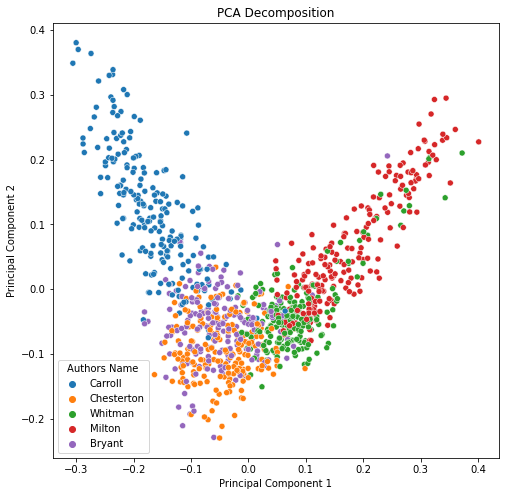

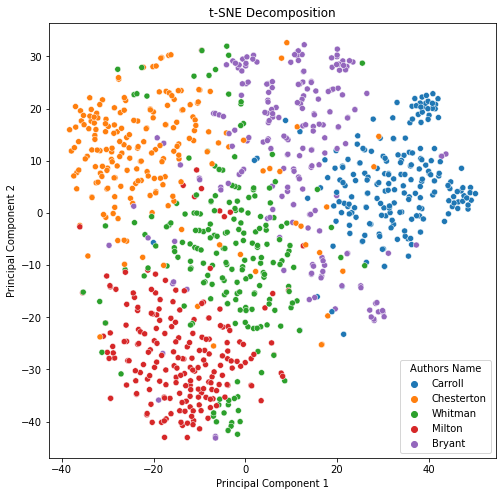

In [ ]:
text_train = np.concatenate((df_books_train_tfidf,df_books_test_tfidf), axis=0)
text_labels = np.concatenate((df_books_labels_train,df_books_labels_test), axis=0)
from sklearn.decomposition import PCA
principal_components = PCA(n_components=2).fit_transform(text_train) # Fit and transform
df_PCA = pd.DataFrame(principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_PCA['Authors Labels']=text_labels
df_PCA['Authors Name']=le.inverse_transform(text_labels)

plt.figure(figsize=(8,8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue="Authors Name",
                data=df_PCA).set_title('PCA Decomposition')
#--------------
from sklearn.manifold import TSNE
principal_components = TSNE(n_components=2).fit_transform(text_train) # Fit and transform
df_TSNE = pd.DataFrame(principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_TSNE['Authors Labels']=text_labels
df_TSNE['Authors Name']=le.inverse_transform(text_labels)

plt.figure(figsize=(8,8))
b=sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue="Authors Name",
                data=df_TSNE).set_title('t-SNE Decomposition', fontsize = 12)
#sns.set(font_scale=1.4)